# Funciones de distribución de probabilidades

### Distribución uniforme

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
a = 1
b = 100
n = 1000000
#a siempre debe ser menor que b

data = np.random.uniform(a, b, n)

(array([100303.,  99672., 100322.,  99673., 100331.,  99881., 100036.,
        100205.,  99629.,  99948.]),
 array([ 1.0000806 , 10.90007007, 20.80005954, 30.70004901, 40.60003848,
        50.50002795, 60.40001742, 70.3000069 , 80.19999637, 90.09998584,
        99.99997531]),
 <BarContainer object of 10 artists>)

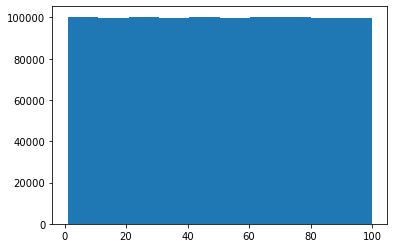

In [14]:
#especifica matplotlib inline
%matplotlib inline
plt.hist(data)

### Distribución normal

In [25]:
#con la funcion randn python genera números aleatorios (entre paréntesis cuántos números quiere generar)
data1 = np.random.randn(1000000)

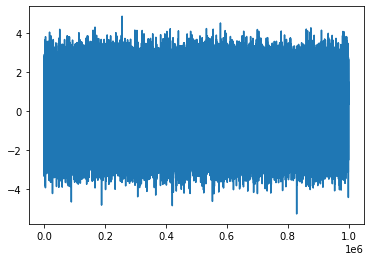

In [28]:
#para dibujarlos uno después de otro, dibujo la serie que en abscisa habrá 1,2 .... a medida que salen y en la altura dibuja el valor que tiene
x = range(1,1000001)  #unas x que estén en el rango entre 1 y uno más que el número de datos generados
plt.plot(x, data1)

(array([8.00000e+00, 6.10000e+02, 1.24610e+04, 9.87580e+04, 3.08042e+05,
        3.71617e+05, 1.74523e+05, 3.17360e+04, 2.19000e+03, 5.50000e+01]),
 array([-5.27344521, -4.25878021, -3.24411521, -2.22945021, -1.21478521,
        -0.20012021,  0.81454479,  1.8292098 ,  2.8438748 ,  3.8585398 ,
         4.8732048 ]),
 <BarContainer object of 10 artists>)

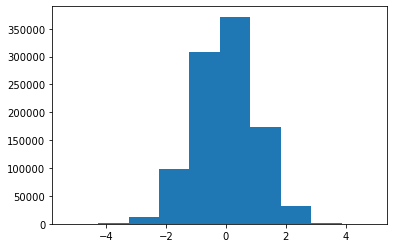

In [29]:
%matplotlib inline
plt.hist(data1)

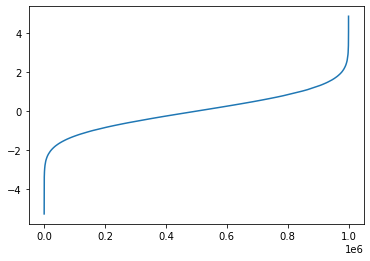

In [32]:
plt.plot(x, sorted(data1)) #para comprobar que se trata de una distribución normal o gaussiana

(array([  41.,  265.,  966., 2116., 2926., 2271., 1064.,  286.,   62.,
           3.]),
 array([-2.928428  , -1.08142338,  0.76558124,  2.61258586,  4.45959048,
         6.3065951 ,  8.15359971, 10.00060433, 11.84760895, 13.69461357,
        15.54161819]),
 <BarContainer object of 10 artists>)

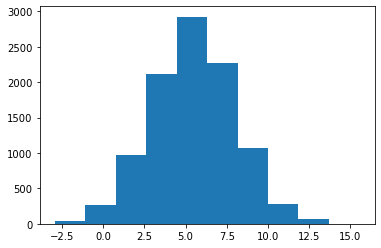

In [38]:
#crear una normal standard cualquiera gracias al teorema central del límite
mu = 5.5
sd = 2.5
z_10000 = np.random.randn(10000)
data = mu + sd * z_10000 # Teorema central del límite: Z = (X - mu ) /  sd (Tipificar una variable aleatoria en una normal )
                                        #-> termina siendo N(0,1), despedjando x: X = mu + sd *  Z
plt.hist(data)

In [ ]:
#se le puede dar un array de números para obtener diferentes versiones o arrays de la normal

In [40]:
data = np.random.randn(2,4) #devuelve dos muestras o arrays aleatorios, cada una de tamaño cuatro y que componen un campana de gauss
data

array([[-0.20616541,  0.88528539, -1.12642575,  1.28299181],
       [-1.42747552, -0.31628198, -1.21609841, -0.04275536]])

# La simulación de montecarlo

* Generamos dos números aleatorios uniformes x e y entre 0 y 1 en total 1000 veces
* calcularemos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del círculo

* Calculamos el número de veces que están dentro del círculo y lo dividimos entre el número total de intentos
para obtener una aproximación de la probabilidad de caer dentro del círculo
* Usamos dicha probabilidad para aproximar el valor de pi y 
repetimos el experimento un número suficiente de veces (por ejemplo 100) para obtener diferentes aproximaciones de pi
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.

3.1423200000000002


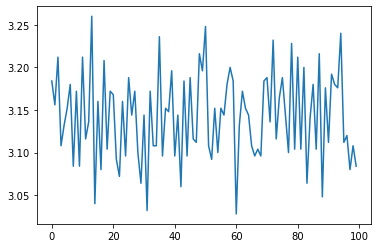

In [47]:
# Para hacerlo como una función
def pi_montecarlo(n, n_exp):
    pi_avg = 0 
    
    pi_value_list = []
    for i in range(n_exp):
        value = 0 
        x = np.random.uniform(0,1,n).tolist() #generando 1000 números a formato lista 
        y = np.random.uniform(0,1,n).tolist() #generando 1000 números a formato lista
        for j in range(n):  #segundo bucle
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])  #los corchetes porque x e y son listas y siendo estrictos le colocamos la raiz cuadrada .sqrt
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)
    


3.1398220000000014


(3.1398220000000014, [<matplotlib.lines.Line2D at 0x20de0507f70>])

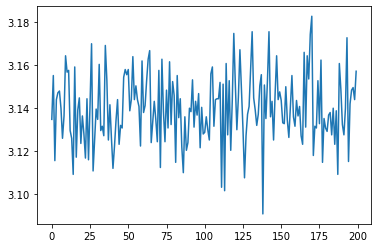

In [48]:
pi_montecarlo(10000, 200)

# Dummy Data Sets

In [ ]:
#El concepto básico es hacer un array de números aleatorios generados a través de varios metodos, 
# donde cada uno de dichos métodos obtiene un vector columna que pasará a ser la columna del dataframe
# los nombres de las columnas y sus descripciones se pasan como columnas de la generación del dataset en forma de diccionarios
# son las claves, y los valores son cada una de las colecciones generadas aleatoriamente.
# 

In [53]:
data = pd.DataFrame(
    {
        'A' : np.random.randn(10),
        'B' : 1.5 + 2.5 * np.random.randn(10),
        'C' : np.random.uniform(5, 32, 10)
    }

)

In [54]:
data

,A,B,C
0,-1.511343,-8.368210,22.556995
1,0.251438,4.781482,13.781518
2,-0.103902,2.996686,21.661635
3,-0.969177,0.621957,9.106895
4,2.396051,-3.211799,8.750309
5,0.637270,-1.639905,23.518837
6,-0.684481,1.240837,17.910094
7,0.155855,4.506596,31.285759
8,0.104059,0.399588,28.576825
9,-0.858961,1.002940,30.644283


In [55]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), # una normal 0: 1 debería tener media 0 y Std 1
        'B' : 1.5 + 2.5 * np.random.randn(n), # una normal 1.5 2.5 media 1.5 y std 2.5
        'C' : np.random.uniform(5, 32, n)
    }

)

In [56]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001298,1.498026,18.502798
std,0.998808,2.503132,7.797676
min,-4.946717,-11.245922,5.000019
25%,-0.674856,-0.188540,11.762212
50%,-0.002311,1.497411,18.500192
75%,0.673422,3.186221,25.254527
max,4.839656,12.843683,31.999982


(array([3.20000e+01, 1.36800e+03, 2.06480e+04, 1.28820e+05, 3.28681e+05,
        3.43546e+05, 1.48679e+05, 2.63150e+04, 1.85800e+03, 5.30000e+01]),
 array([-4.94671747, -3.96808008, -2.98944269, -2.0108053 , -1.03216791,
        -0.05353052,  0.92510687,  1.90374426,  2.88238164,  3.86101903,
         4.83965642]),
 <BarContainer object of 10 artists>)

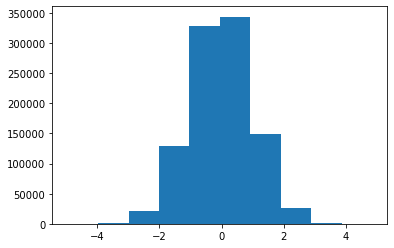

In [57]:
plt.hist(data["A"])

(array([1.50000e+01, 7.18000e+02, 1.30480e+04, 9.34690e+04, 2.82499e+05,
        3.62996e+05, 1.97547e+05, 4.51000e+04, 4.43100e+03, 1.77000e+02]),
 array([-11.24592158,  -8.83696115,  -6.42800072,  -4.01904029,
         -1.61007986,   0.79888057,   3.207841  ,   5.61680143,
          8.02576186,  10.43472228,  12.84368271]),
 <BarContainer object of 10 artists>)

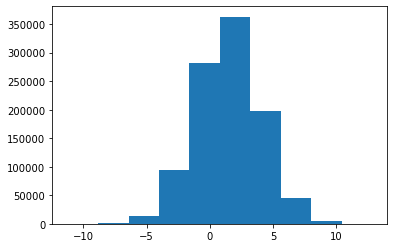

In [58]:
plt.hist(data["B"])

(array([100107.,  99796.,  99984., 100394.,  99711., 100058.,  99743.,
        100012.,  99688., 100507.]),
 array([ 5.0000188 ,  7.70001514, 10.40001147, 13.10000781, 15.80000415,
        18.50000049, 21.19999682, 23.89999316, 26.5999895 , 29.29998584,
        31.99998217]),
 <BarContainer object of 10 artists>)

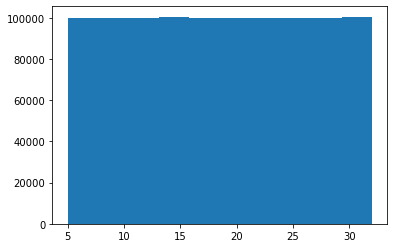

In [59]:
plt.hist(data["C"])

In [60]:
# Generar dummie dataframes con variables categoricas o strings como parte del dummie dataframe

In [61]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [63]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [64]:
colum_names = data.columns.values.tolist()

In [65]:
a = len(colum_names)
a

21

In [68]:
new_data = pd.DataFrame(
    {
        'Column Name' : colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
    
)

In [69]:
new_data

,Column Name,A,B
42,State,-0.552708,0.739001
43,Account Length,-1.452109,0.479367
44,Area Code,-1.399853,0.363396
45,Phone,-2.733508,0.745976
46,Int'l Plan,-0.584561,0.960494
47,VMail Plan,-0.415519,0.870458
48,VMail Message,-0.602528,0.851263
49,Day Mins,0.241147,0.366928
50,Day Calls,0.018534,0.207289
51,Day Charge,-1.156313,0.452186


In [ ]:
# el índice empieza  en el número que deseamos para por ej empalmar con otrodataframe